## Segmenting and Clustering Neighborhoods in Toronto - ARS
***

This notebook covers only the week 3 portion of the assignment, the final project will be in a separate notebook 

In [1]:
import pandas as pd

### Read table from html page using pandas

In [67]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
to_neighborhoods = dfs[0]
to_neighborhoods.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### Remove postal codes which have 'Not Assigned' boroughs

In [68]:
to_neighborhoods = to_neighborhoods[to_neighborhoods['Borough']!='Not assigned']

### Check if there are neighborhoods which are 'Not Assigned'

In [69]:
to_neighborhoods[to_neighborhoods['Neighbourhood']=='Not assigned'] #checking reveals that there are no such row

,Postal Code,Borough,Neighbourhood


In [73]:
to_neighborhoods.reset_index(drop=True, inplace=True)
to_neighborhoods.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [74]:
print('The size of the dataframe is: ',to_neighborhoods.shape)

The size of the dataframe is:  (103, 3)


***

In [75]:
# Create a temp dataframe to store lat long values
tempdf = pd.DataFrame(columns=['Postal Code','Latitude','Longitude'])
tempdf['Postal Code'] = to_neighborhoods['Postal Code'].copy()
tempdf.head()

,Postal Code,Latitude,Longitude
0,M3A,NaN,NaN
1,M4A,NaN,NaN
2,M5A,NaN,NaN
3,M6A,NaN,NaN
4,M7A,NaN,NaN


In [76]:
# Using pgeocode libary for better results than geopy.geocoder
import pgeocode

for pcode in to_neighborhoods['Postal Code']:
    latlong=None
    while latlong is None:
        nomi = pgeocode.Nominatim("ca")
        latlong = nomi.query_postal_code(pcode)
#     print(pcode,"---->",latlong.latitude,", ",latlong.longitude)
    tempdf.loc[tempdf['Postal Code']==pcode, 'Latitude'] = latlong.latitude
    tempdf.loc[tempdf['Postal Code']==pcode, 'Longitude'] = latlong.longitude
tempdf.head()  

,Postal Code,Latitude,Longitude
0,M3A,43.7545,-79.33
1,M4A,43.7276,-79.3148
2,M5A,43.6555,-79.3626
3,M6A,43.7223,-79.4504
4,M7A,43.6641,-79.3889


In [77]:
# Create the required dataframe
to_neighborhoods = to_neighborhoods.merge(tempdf, on = 'Postal Code', how = 'left')

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7545,-79.33
1,M4A,North York,Victoria Village,43.7276,-79.3148
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6641,-79.3889
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.6518,-79.5076
99,M4Y,Downtown Toronto,Church and Wellesley,43.6656,-79.383
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.7804,-79.2505
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.6325,-79.4939


In [80]:
to_neighborhoods.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7545,-79.33
1,M4A,North York,Victoria Village,43.7276,-79.3148
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7223,-79.4504
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6641,-79.3889


In [81]:
# Setting save point
to_neighborhoods.to_csv('to_neighborhoods.csv', index=False)

### Explore and Cluster neighborhoods in Toronto

In [91]:
# Consider only Boroughs with the word 'Toronto' in their name
to_city = to_neighborhoods.loc[to_neighborhoods['Borough'].str.contains('Toronto')].reset_index(drop=True)
to_city.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6641,-79.3889
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.6572,-79.3783
3,M5C,Downtown Toronto,St. James Town,43.6513,-79.3756
4,M4E,East Toronto,The Beaches,43.6784,-79.2941


### Visualizing the neighborhoods on a map

In [119]:
import folium
to_city_map = folium.Map(location=[to_city.loc[0,'Latitude'],to_city.loc[0,'Longitude']],zoom_start=11)

for n in to_city.index:
    lat = to_city.loc[n,'Latitude']
    lon = to_city.loc[n,'Longitude']
    label = to_city.loc[n,'Borough'] + ": " + to_city.loc[n,'Neighbourhood']
    folium.CircleMarker(
        [lat,lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color = '#3186cc',
        fill_opacity = 0.5
    ).add_to(to_city_map)
    
to_city_map

#### Define Foursquare credentials

In [121]:
CLIENT_ID = 'C05Q51YGYGAUD5A5QYRCAG1VQ1IU24PTMX5M0CTFXKPWNZNL' # your Foursquare ID
CLIENT_SECRET = 'ZV02NS3MIQNJGZUXG5VVSPYX0VYGTG1FQXOCJBE5GJOQEQF5' # your Foursquare Secret
VERSION = '20200101' # Foursquare API version

#### Explore top 100 venues in all the neighborhoods

In [157]:
import requests
venue_list=[]
for lat, lon, postalcode in zip(to_city['Latitude'],to_city['Longitude'],to_city['Postal Code']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lon, 
        '500', 
        '100')
    # Getting relevant results with get request to Foursquare
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for v in results:
        venue_list.append((postalcode,
                           v['venue']['name'],
                           v['venue']['location']['lat'],
                           v['venue']['location']['lng'],
                           v['venue']['categories'][0]['name']))

to_city_venues = pd.DataFrame(venue_list,columns=['Postal Code','Venue','Venue Latitude','Venue Longitude','Venue Category'])     

In [160]:
toronto_venues = to_city.merge(to_city_venues,on='Postal Code',how='right')
toronto_venues

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626,Tandem Coffee,43.653559,-79.361809,Coffee Shop
1,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626,Roselle Desserts,43.653447,-79.362017,Bakery
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626,The Yoga Lounge,43.655515,-79.364955,Yoga Studio
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6555,-79.3626,Sumach Espresso,43.658135,-79.359515,Coffee Shop
...,...,...,...,...,...,...,...,...,...
1554,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.7804,-79.2505,Mitra Hot Yoga,43.776812,-79.247074,Yoga Studio
1555,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.7804,-79.2505,Milestones,43.778060,-79.255321,Restaurant
1556,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.7804,-79.2505,Teriyaki Experience,43.783539,-79.253117,Japanese Restaurant
1557,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.7804,-79.2505,Lee Center Park,43.781242,-79.246519,Park


In [166]:
print('There are ',len(toronto_venues['Venue Category'].unique()),' unique categories of venues')

There are  218  unique categories of venues


### Analyze the nieghborhoods
Creating onehot encoded dataframe for clustering

In [224]:
toronto_onehot = toronto_venues[['Postal Code']]
temp = pd.get_dummies(toronto_venues['Venue Category'],prefix="", prefix_sep="")
toronto_onehot = toronto_onehot.join(temp)
toronto_onehot.head()

,Postal Code,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [305]:
toronto_grouped = toronto_onehot.groupby('Postal Code').mean().reset_index()
toronto_grouped.head()

,Postal Code,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M4E,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,M4K,0.0,0.0,0.028571,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028571
2,M4L,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,M4M,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,M4N,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### Cluster Neighborhoods

#### Calculating best k by elbow method

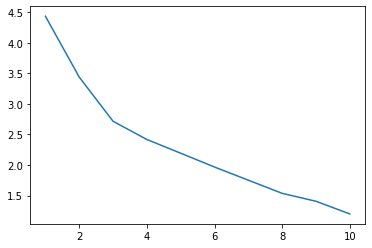

In [310]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Ks = 10
toronto_clustering = toronto_grouped.drop('Postal Code',1)
acc = [0,0,0,0,0,0,0,0,0,0]

for n in range(1,Ks+1):
    kmeans = KMeans(n_clusters=n, random_state=6).fit(toronto_clustering)
    acc[n-1] = kmeans.inertia_
    
plt.plot(range(1,Ks+1),acc)


In [311]:
kclusters = 3
kmeans = KMeans(n_clusters=5).fit(toronto_clustering)
kmeans.labels_[0:10]

array([0, 0, 0, 0, 2, 0, 2, 0, 2, 0])

In [312]:
toronto_grouped.insert(1,'Cluster Labels',kmeans.labels_)

In [313]:
toronto_grouped.head()

,Postal Code,Cluster Labels,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M4E,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,M4K,0,0.0,0.0,0.028571,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028571
2,M4L,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,M4M,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,M4N,2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [314]:
toronto_final = toronto_grouped.merge(to_neighborhoods[['Postal Code','Neighbourhood']], on='Postal Code', how='left')

In [315]:
cats = toronto_final.columns[2:-1]
toronto_final = toronto_final[['Postal Code','Neighbourhood','Cluster Labels']+list(cats)]
toronto_final.head()

,Postal Code,Neighbourhood,Cluster Labels,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M4E,The Beaches,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,M4K,"The Danforth West, Riverdale",0,0.0,0.0,0.028571,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028571
2,M4L,"India Bazaar, The Beaches West",0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,M4M,Studio District,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,M4N,Lawrence Park,2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [316]:
toronto_final.loc[toronto_final['Cluster Labels']==0]

,Postal Code,Neighbourhood,Cluster Labels,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M4E,The Beaches,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,M4K,"The Danforth West, Riverdale",0,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571
2,M4L,"India Bazaar, The Beaches West",0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,M4M,Studio District,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,M4P,Davisville North,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,M4S,Davisville,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,M4V,"Summerhill West, Rathnelly, South Hill, Forest...",0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11,M4X,"St. James Town, Cabbagetown",0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,M4Y,Church and Wellesley,0,0.000000,0.013158,0.013158,0.000000,0.000000,0.013158,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316
13,M5A,"Regent Park, Harbourfront",0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.043478


In [317]:
toronto_final.loc[toronto_final['Cluster Labels']==1]

,Postal Code,Neighbourhood,Cluster Labels,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
22,M5N,Roselawn,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [318]:
toronto_final.loc[toronto_final['Cluster Labels']==2]

,Postal Code,Neighbourhood,Cluster Labels,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
4,M4N,Lawrence Park,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,M4R,"North Toronto West, Lawrence Park",2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,M4T,"Moore Park, Summerhill East",2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,M4W,Rosedale,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,M5J,"Harbourfront East, Union Station, Toronto Islands",2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,M6G,Christie,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [319]:
toronto_final.loc[toronto_final['Cluster Labels']==3]

,Postal Code,Neighbourhood,Cluster Labels,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
34,M6P,"High Park, The Junction South",3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [320]:
toronto_final.loc[toronto_final['Cluster Labels']==4]

,Postal Code,Neighbourhood,Cluster Labels,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
23,M5P,"Forest Hill North & West, Forest Hill Road Park",4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
